# TP Python - Analyse de données

Groupe:
- Ulysse ARNAUD
- Abd-el-illah BELLIFA
- Aurélien SANTANA

Ce TP traite du sujet "Travail et Covid" et la problèmatique suivante :

La situation professionnelle a t'elle eu un impact sur l'état mental pendant la 7eme vague ?





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def read_csv(file):
    return pd\
      .read_csv(file + '.csv', error_bad_lines=False, index_col=False, dtype='unicode')\
      .dropna(axis = 'columns', how = 'all')

In [3]:
def showPieQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  nb_columns = len(significations)
  colors = cm.Spectral([float(x) / nb_columns for x in range(nb_columns)])

  fig1, ax1 = plt.subplots(figsize=(7,7))
  pie = \
    ax1.pie(
      values,
      autopct='%1.1f%%',
      startangle=30,
      colors=colors,
      radius=1
  )
  ax1.legend(
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  ax1.axis('equal')

  plt.show()

In [4]:
def showPlotQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  fig1, ax1 = plt.subplots(figsize=(7,7))
    
  plot = \
    ax1.plot(
      significations,
      values,
      label=significations,
      color="DarkBlue",
      linewidth=1
  )
  ax1.legend(
      handles=plot,
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  plt.show()

In [5]:
def showBarQuestion(question):
  values = getCountOfColumn(question).apply(pd.Series.value_counts)
  values = np.ravel(values)

  significations = getDictSignifications(question)
  significations = list(significations['Signification'])

  nb_columns = len(significations)

  fig1, ax1 = plt.subplots(figsize=(7,7))
  
  ax1.xaxis.set_visible(False)
  
  colors = cm.Spectral([float(x) / nb_columns for x in range(nb_columns)])
  
  bar = \
    ax1.bar(
      significations,
      values,
      label=significations,
      color=colors,
      linewidth=1,
      edgecolor='white'
  )
  ax1.legend(
      handles=bar,
      labels=significations, 
      loc='best', 
      bbox_to_anchor=(0, 1), 
      fontsize=8
  )

  plt.show()

In [6]:
def getSondageCovid(): return read_csv("Sondage_covidVague7")

In [7]:
def getDicoVariablesCovid(): return read_csv("Dico_variables_covid")

In [8]:
"""
Affiche les significations pour chaque question dans le cas où aucun n'est
défini dans les paramètres, sinon affiche les significations du label défini

Utilisation:
getDictSignifications() # Affiche toutes les significations
getDictSignifications("C51") # Affiche les significations de C51
"""
def getDictSignifications(label=None):
  dicoVariables = getDicoVariablesCovid()
  dicoVariables.Code = dicoVariables.Code.astype(int)
  dicoVariablesGrouped = dicoVariables.groupby(['Question_Better'])
  
  result = dict()

  for item in dicoVariablesGrouped.indices:
    result[item] = \
      dicoVariables.iloc[\
        dicoVariablesGrouped.indices[item], \
        [dicoVariables.columns.get_loc('Code'),\
         dicoVariables.columns.get_loc('Signification')]\
      ]

  return pd.DataFrame.from_dict(result[label]) \
    if label != None \
    else pd.Series(result)

In [9]:
"""
Recherche dans un dictionnaire.
S'agit d'un "helper".

Utilisation:
whereInDict(aDict, "Code", "==", 1)
"""
def whereInDict(
    _dict, 
    conditionAttribute, 
    conditionOperator, 
    conditionValue
    ):
  return eval("_dict[_dict." + str(conditionAttribute) + " " + str(conditionOperator) + " " + str(conditionValue) + "]")


In [10]:
def getCountOfColumn(column):
  sondageCovid = getSondageCovid()
  return sondageCovid[[column]]

In [11]:
"""
Affiche les différentes valeurs de "Question_Better", 
soit les différentes questions
"""
def showSignificationsName():
    return getDictSignifications().keys()


Ce graphe donne une vision globale sur l'état mental des Français 
On apprend donc que au moins 1 personne sur 2 rencontre un des problemes suivants:

*   Vous sentir triste, déprimé(e) ou désespéré(e) 
*   Éprouver un sentiment de nervosité, d’anxiété ou de tension 
*   Être incapable d’arrêter de vous inquiéter ou de contrôler vos inquiétudes 
*   Avoir peu d’intérêt ou de plaisir à faire des choses 



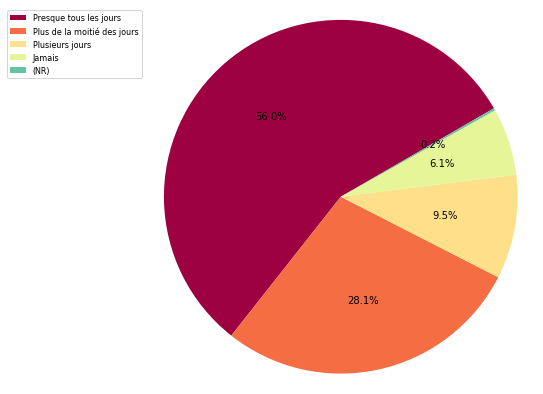

In [12]:
showPieQuestion("C51")

Parmi les 56.0% de personnes ayant au moins un problemes preques tout les jours, 47.3% d'entre eux déclare souffrir de dépression 





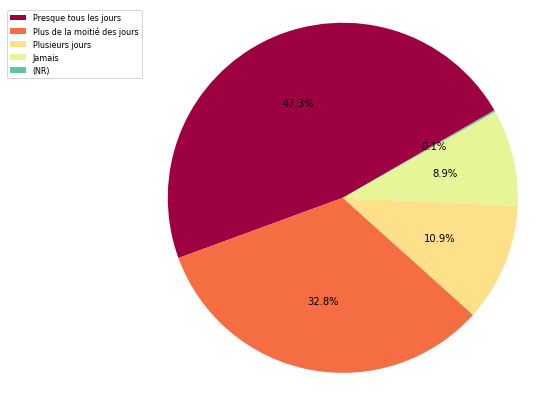

In [13]:
showPieQuestion("C52")

une vue sur La situation professionelle global : 
on constate que malrgé le déconfinnement seulement 44.8% ont repri le travail normal et 13.5% continue en téléTravail 

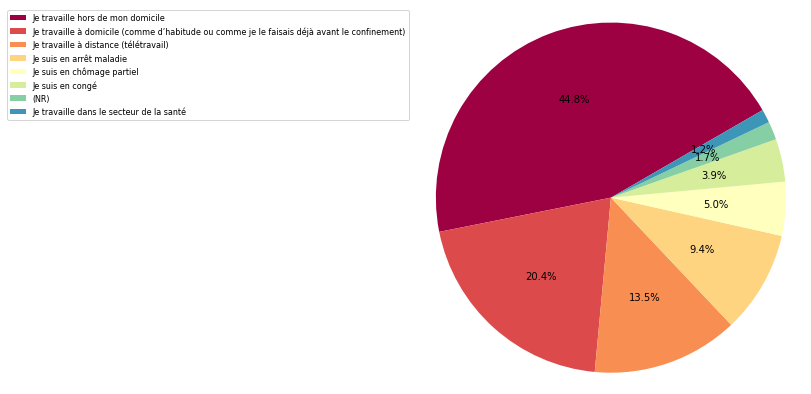

In [14]:
showPieQuestion("C6_0")

Ce graphe montre que le chômage inquiète beaucoup les personnes interrogées et il a un impact sur leur état mental

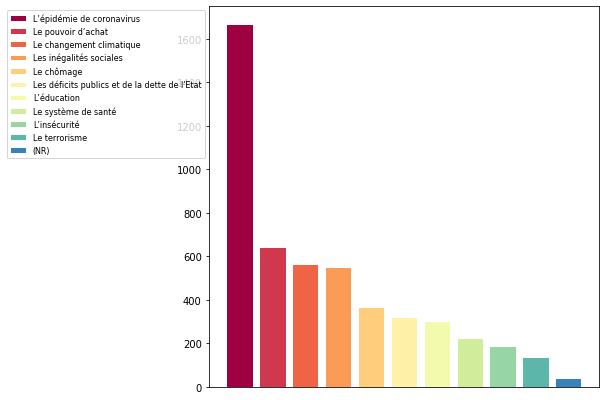

In [15]:
showBarQuestion('A0_0')

Ce dernier graphe nous donne une idée sur le secteur d'activité des personnes ayant répondu au questionnaire 

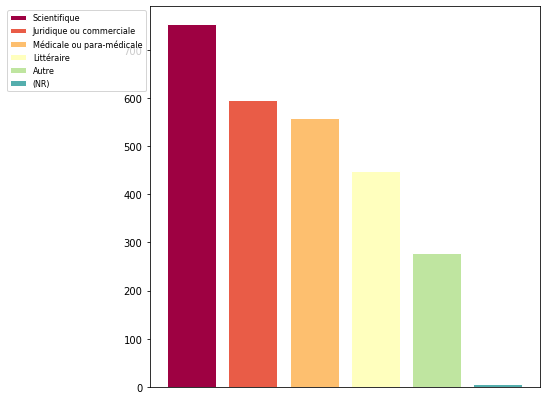

In [16]:
showBarQuestion('C11')